In [708]:
# CSE 404 Introduction to Machine Learning (Fall 2022)
# Homework 2 

#Avi Lochab
# Perceptron Learning Algorithm (PLA)
# Linear Regression

In [31]:
# Import all the things
import time
import numpy as np                    #vectors, matrices, linear algebra...
from random import choice             #randomly select item from list
from sklearn.utils import shuffle     # shuffle randomly reorders the values
import matplotlib.pyplot as plt       #plots/graphs
import random
import math
from sklearn.model_selection import train_test_split

import sklearn

Mean of hand matcher genuine score: 50.644444444444446
Mean of hand matcher imposter score: 144.43555555555557
Mean of fingerprint matcher genuine score: 306.58222222222224
Mean of fingerprint matcher imposter score: 7.971111111111111
Variance for hand matcher genuine score: 1516.273580246914
Variance for hand matcher imposter score: 6925.659180246915
Variance for fingerprint matcher genuine score: 40825.04323950619
Variance for fingerprint matcher imposter score: 90.80583209876544
D-prime for fingerprint matcher: 2.087734064082002
D-prime for hand matcher: 1.443629454107897
FMR for fingerprint matcher:  0.0
FNMR for fingerprint matcher:  0.8044444444444444
FMR for handmatcher:  0.9644444444444444
FNMR for handmatcher:  0.0


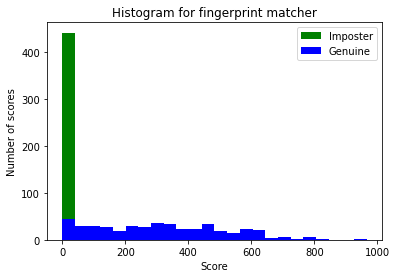

In [74]:
from scipy import integrate
import numpy as np
import math
x_i = np.loadtxt('finger_impostor.score')
x_g = np.loadtxt('finger_genuine.score')

h_i = np.loadtxt('hand_impostor.score')
h_g = np.loadtxt('hand_genuine.score')

def	func(x,	y,	truth):
    ctr	=	0
    tot	=	0
    				
    if	truth	==	1:
        for	i	in	x:
            if i >	y:
                ctr +=	1
            
            tot	+=	1
        
            
        return	ctr	/ tot
    								
    for	i	in	x:
        if	i	<=	y:	
            ctr +=	1
        tot	+=	1
            
        
    return	ctr	/ tot


hand_genuine_mean = np.sum(h_g) / len(h_g)
print("Mean of hand matcher genuine score:", hand_genuine_mean)

hand_imposter_mean = np.sum(h_i) / len(h_i)
print("Mean of hand matcher imposter score:", hand_imposter_mean)

finger_genuine_mean = np.sum(x_g) / len(x_g)
print("Mean of fingerprint matcher genuine score:", finger_genuine_mean)

finger_imposter_mean = np.sum(x_i) / len(x_i)
print("Mean of fingerprint matcher imposter score:", finger_imposter_mean)


hand_genuine_var = np.var(h_g)
print("Variance for hand matcher genuine score:", hand_genuine_var)

hand_imposter_var = np.var(h_i)
print("Variance for hand matcher imposter score:", hand_imposter_var)

finger_genuine_var = np.var(x_g)
print("Variance for fingerprint matcher genuine score:", finger_genuine_var)

finger_imposter_var = np.var(x_i)
print("Variance for fingerprint matcher imposter score:", finger_imposter_var)

def dPrime (var_gen, var_imp, mean_gen, mean_imp):

    return math.sqrt(2) * (abs(mean_gen - mean_imp) / math.sqrt(var_gen + var_imp))

print("D-prime for fingerprint matcher:", dPrime (finger_genuine_var, finger_imposter_var, finger_genuine_mean, finger_imposter_mean))
print("D-prime for hand matcher:", dPrime (hand_genuine_var, hand_imposter_var, hand_genuine_mean, hand_imposter_mean))
    




print("FMR for fingerprint matcher: ",func(x_i, 500, 1))
print("FNMR for fingerprint matcher: ",func(x_g, 500, 0))
print("FMR for handmatcher: ", func(h_i, 300, 0))
print("FNMR for handmatcher: ", func(h_g, 300, 1))
    

def distribution (l1, l2):
    high = max(max(l1), max(l2))
    low = min(min(l1), min(l2))
    return high, low

high, low = distribution(x_i, x_g)
bins = np.linspace(low, high, 25)
plt.figure()
plt.hist(x_i, bins, color = "green", label = "Imposter")
plt.hist(x_g, bins, color = "blue", label = "Genuine")
plt.ylabel("Number of scores")
plt.xlabel("Score")
plt.title("Histogram for fingerprint matcher")
plt.legend()
plt.show()

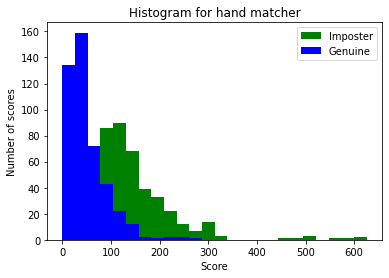

In [75]:
high_h, low_h = distribution(h_i, h_g)
bins = np.linspace(low_h, high_h, 25)
plt.figure()
plt.hist(h_i, bins, color = "green", label = "Imposter")
plt.hist(h_g, bins, color = "blue", label = "Genuine")
plt.ylabel("Number of scores")
plt.xlabel("Score")
plt.title("Histogram for hand matcher")
plt.legend()
plt.show()

In [76]:
def sim_count_score (gen, imp, m):
    FNMR = 0
    FMR = 0
    
    for i in range(len(imp)):
        
        if i > m:
            FMR += 1
            
    for i in range(len(gen)):
        
        if i < m:
            FNMR += 1
            
    return FMR / len(imp), FNMR / len(gen)
    
    
def disim_count_score (gen, imp, m):
    FNMR = 0
    FMR = 0
    
    for i in range(len(imp)):
        
        if i < m:
            FMR += 1
            
    for i in range(len(gen)):
        
        if i > m:
            FNMR += 1
            
    return FMR / len(imp), FNMR / len(gen)
    

In [97]:

def create_graph (gen, imp, high, low, truth = True):
    
    low = int(low)
    high = int(high)
    

    FMR = []
    FNMR = []

    temp = 1 / 1000
    i = low

    while i < high:
        if (truth == False):
            FMR_temp , FNMR_temp = disim_count_score (gen, imp, i)

        else:
            FMR_temp , FNMR_temp = sim_count_score (gen, imp, i)

        FNMR.append(FNMR_temp)
        FMR.append(FMR_temp)
        
        i += temp


        plt.figure()
        plt.plot(FMR, FNMR, color = "green", label = "Imposter")

        plt.plot([0, 1], [0, 1])
        plt.plot([0.1, 0.1], [0, 1])
        plt.plot([0.01, 0.01], [0, 1])
        plt.plot([0.05, 0.05], [0, 1])
        plt.show()

        return FMR, FNMR



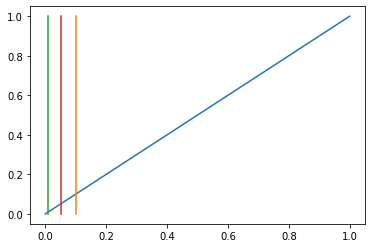

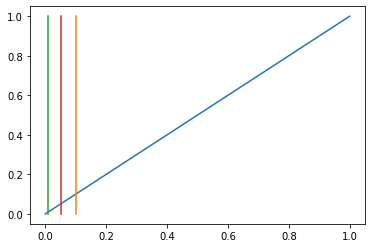

In [100]:
nFMR, NFNMR = create_graph (x_g, x_i, high, low, truth = True)
nFNMR, NFNMR = create_graph (h_g, h_i, high, low, truth = False)

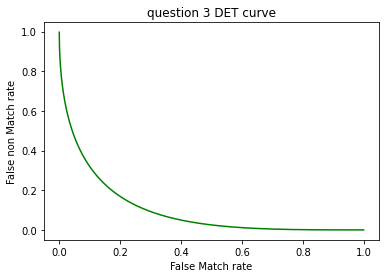

In [91]:

temp = 1 / 1000

FMR = []
FNMR = []

def gen(i):
     return 3 * i * i
    
def imp(i):
     return 2 - (2 * i)
  
i = 0
    
while (i < 1):
    fnmr, t = integrate.quad(gen, 0, i)
    fmr, t = integrate.quad(imp, i, 1)
        
    i += temp
        
    FMR.append(fmr)
    FNMR.append(fnmr)
        

        
        
    
plt.figure()
plt.plot(FMR, FNMR,  color = "green")
plt.xlabel("False Match rate")
plt.ylabel("False non Match rate")
plt.title("question 3 DET curve")
plt.show()

FMR: 0.488
FNMR: 0.96


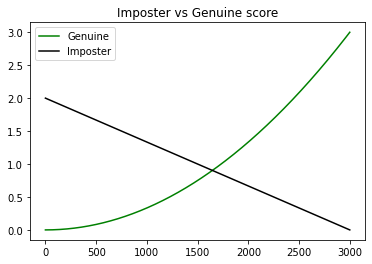

In [23]:
data = np.linspace(0, 1, 2000)

genuine = 3 * data * s
imposter = 2 - (2 * s)

plt.figure()
plt.plot(genuine, color = "green", label = "Genuine")
plt.plot(imposter, color = "black", label = "Imposter")
plt.title("Imposter vs Genuine score")
plt.legend()
plt.show()


In [ ]:
plt.figure()
plt.hist(FMR, color = "green", label = "FMR")
plt.plot(FNMR, color = "black", label = "FNMR")
plt.ylabel("Number of scores")
plt.xlabel("Score")
plt.title("Histogram for fingerprint matcher")
plt.legend()
plt.show()

In [710]:
# For Perceptron
# Trains a perceptron model given a training dataset
# @training_data :: List of data points, 
#                   where training_data[0] contains data points
#                   & training_data[1] contains labels {-1, +1}
# Returns: Learned model vector

def train_perceptron(training_data):
    
    X = training_data[0]     # dataset
    y = training_data[1]     # labels
    model_size = X.shape[1]  # num columns; X.shape[0] --> # rows
    w = np.zeros(model_size) # zeroed column vector, size of model
                             # Random init: np.random.rand(model_size)
    
    iteration = 1
    count = 0
    # while True, do PLA steps
    while True:
        count += 1
        # compute results according to the hypothesis
        
        results = np.sign(np.multiply(np.matmul(X, w), y))
        
        
        # get incorrect predictions (can use the indices)
        indices = np.arange(X.shape[0])
        misclassified_indices = indices[results != 1]
         

        # Check the convergence criteria (if there are no misclassified
        # points, the PLA is converged and we can stop)
        
        if len(misclassified_indices) == 0:
            break
        

        # Pick one misclassified example (x*,y*)
        pick = choice(misclassified_indices)
        
        x_s, y_s = X[pick], y[pick]
        
        w += y_s * x_s
         

        # Update the weight vector with perceptron update rule
        

        iteration += 1

    return w, iteration     # return weight vector (model)



In [711]:
# For Perceptron
# Print the predictions given a dataset & learned model
# @model :: model (weight) vector
# @data :: data points
# Returns: none

def print_prediction(model,data):
    print("test")
    result = np.matmul(data,model)
    predictions = np.sign(result)
    for i in range(len(data)):
        print("{}: {} -> {}".format(data[i][:2], result[i], predictions[i]))    

In [712]:
# For Linear Regression
# Randomly split the dataset into training & testing sets
# @train_perc :: Percentage (in decimal format) of data to use for training
#                Example: if train_perc == 0.7 --> 70% training, 30% testing
# @data :: features
# @label :: targets
# Returns training data, testing data, training labels, testing labels

def rand_split_train_test(data, label, train_perc):
    if train_perc >= 1 or train_perc <= 0:
        raise Exception('train_perc should be between (0,1).')
    sample_size = data.shape[0]     # num rows 
    if sample_size < 2:
        raise Exception('Sample size should be larger than 1. ')

    num_train_sample = np.max([np.floor(sample_size * train_perc).astype(int), 1])
    data, label = shuffle(data, label)

    data_tr = data[:num_train_sample]     
    data_te = data[num_train_sample:]     

    label_tr = label[:num_train_sample]     
    label_te = label[num_train_sample:]     

    return data_tr, data_te, label_tr, label_te

In [713]:
# For Linear Regression
# Takes a subsample of the entire dataset
# Takes subsample_size chunk of X & y within bounds

def subsample_data(data, label, subsample_size):
    # protected sample size
    subsample_size = np.max([1, np.min([data.shape[0], subsample_size])])
    data, label = shuffle(data, label)
    data = data[:subsample_size]
    label = label[:subsample_size]
    return data, label

In [714]:
# For Linear Regression
# Generates a random dataset with dimensions based on feature_size & sample_size
# @feature_size == x_i # columns
# @sample_size == # rows
# @bias :: True --> add Gaussian noise

def generate_rnd_data(feature_size, sample_size, bias=False):
    # Generate X matrix
    data = np.concatenate((np.random.randn(sample_size, feature_size), np.ones((sample_size, 1))), axis=1) \
        if bias else np.random.randn(sample_size, feature_size)  # the first dimension is sample_size (n X d)

    # Generate ground truth model
    # If bias == T: then #rows + 1
    truth_model = np.random.randn(feature_size + 1, 1) * 10 \
        if bias else np.random.randn(feature_size, 1) * 10

    # Generate labels
    label = np.dot(data, truth_model)

    # Add element-wise Gaussian noise to each label
    label += np.random.randn(sample_size, 1)
    return data, label, truth_model

In [715]:
# For Linear Regression
# Sine Function :)

def sine_data(sample_size, order_M, plot_data = False, noise_level = 0.1, bias = False):
    if int(order_M) != order_M: 
        raise Exception('order_M should be an integer.')
    if order_M < 0:
        raise Exception('order_M should be at least larger than 0.')
    
    # Generate X matrix
    x = np.random.rand(sample_size,1) * 2 * np.pi        # generate x from 0 to 2pi
    X = np.column_stack([ x**m for m in range(order_M)])

    data = np.concatenate((X, np.ones((sample_size, 1))), axis=1) if bias else X

    # Ground truth model: a sine function
    f = lambda x: np.sin(x)

    # Generate labels
    label = f(x)

    # Add element-wise Gaussian noise to each label
    label += np.random.randn(sample_size, 1)*noise_level

    if plot_data:
        plt.figure()
        xx = np.arange(0, np.pi * 2, 0.001)
        yy = f(xx)
        plt.plot(xx, yy, linestyle = '-', color = 'g', label = 'Objective Value')
        plt.scatter(x, label, color = 'b', marker = 'o', alpha = 0.3)
        plt.xlabel("t")
        plt.ylabel("x")
        plt.title("Sine Data (N = %d) with Noise Level %.4g.".format(sample_size, noise_level))
        plt.show()

    return data, label, f

In [716]:
# For Linear Regression
# Compute the mean square error (MSE) between the true and predicted labels
# @true_label :: y --> Nx1 vector
# @predicted_label :: y^ --> Nx1 vector
# Returns :: scalar MSE value

def mean_squared_error(true_label, predicted_label):
    
    mse = np.sqrt(np.sum((true_label - predicted_label) ** 2) / true_label.size)
    return mse

In [717]:
# For Linear Regression
# Compute the model vector obtained after MLE
# w_star = (X^T X)^(-1)X^T t
# @feature :: Nx(d+1) matrix
# @target :: Nx1 vector
# Returns :: w_star --> (d+1)x1 model vector

def least_squares(feature, target):

    w_star = np.dot(np.linalg.inv(np.dot(feature.T, feature)), np.dot(feature.T, target))

    return w_star

In [718]:
# For Linear Regression
# Compute the model vector when using L2-norm regularization
# w_star = (X^T X + LI)^(-1) X^T t
# @feature :: Nx(d+1) matrix
# @target :: Nx1 vector
# @lam :: scalar regularization parameter, lambda
# Returns :: w_star --> (d+1)x1 model vector

def ridge_regression(feature, target, lam = 1e-17):
    #TODO
    
    dim = feature.shape[1]
    w_star = np.dot(np.linalg.inv(np.dot(feature.T, feature) + lam * np.identity(dim)), np.dot(feature.T, target))
    return w_star

In [719]:
# For Linear Regression
# k-fold Cross Validation

def k_fold_cross_validation(current_fold, total_fold, total_sample_size, lambda_data = [1e-10,1e-5, 1e-2, 1e-1, 1, 10, 100, 1000]):
    #TODO
    
    sub_data = []
    sub_label = []
    mean = []
    performance = []

    data_set, label_set, z = sine_data(total_sample_size, 3, False, 0.3)
    
    for i in range(total_fold):
        
      sub_label.append(label_set[i * total_sample_size // total_fold : (i + 1) * total_sample_size // total_fold])
      sub_data.append(data_set[i * total_sample_size // total_fold : (i + 1) * total_sample_size // total_fold])
        
    for l in lambda_data:
        
      for i in range(total_fold):
        
        regression = ridge_regression(sub_data[i], sub_label[i], l)
        performance = performance + [mean_squared_error(sub_label[i], np.dot(sub_data[i], regression))]
        
      mean.append(sum(performance) / len(performance))
    
      performance = []
    
    return lambda_data[mean.index(min(mean))], mean.index(min(mean)), mean


In [720]:

# X = np.random.rand(20, 2)
    
# line_x = np.linspace(min(X[:,0]), max(X[:,0]), 20)
# line_y = (9 * line_x - 2) / 6
    
# plt.plot(line_x, line_y)
    
# y = [1 if (9 * X[i, 0] - 2 < 6 * X[i, 1]) else -1 for i in range(20)]
# a_data = [X,y]
    
# color = ["green" if value == 1 else "orange" for value in y]
# plt.scatter(a_data[0][:,0], a_data[0][:,1], color = color)
# plt.xlabel("X1")
# plt.ylabel("X2")
# plt.title("Question A")
# plt.show()
    
    

    
# #     #b)

# w, iter = train_perceptron(a_data)
# print("test")
# gx = - (w[0] * line_x) / w[1]
# plt.plot(line_x, gx, color = "yellow")
# color = [ "red" if value > 0 else "blue" for value in y]
# plt.plot(line_x, line_y, color = "pink")
# plt.scatter(a_data[0][:,0], a_data[0][:,1], color = color)
# plt.title("question B")
# plt.show()




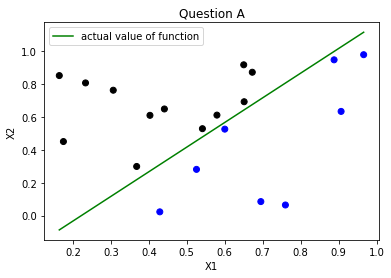

KeyboardInterrupt: 

In [725]:
# MAIN 

if __name__ == '__main__':

    # PERCEPTRON MAIN #########################################
    rnd_x = np.array([[0, 1, 1], \
                      [0.6, 0.6, 1], \
                      [1, 0, 1], \
                      [1, 1, 1], \
                      [0.3, 0.4, 1], \
                      [0.2, 0.3, 1], \
                      [0.1, 0.4, 1], \
                      [0.5, -0.1, 1]])

    rnd_y = np.array([1, 1, 1, 1, -1, -1, -1, -1])
    rnd_data = [rnd_x, rnd_y]

#     trained_model = train_perceptron(rnd_data)
#     print("Model:", trained_model)
#     print(len(trained_model), len (rnd_x))
#     print_prediction(trained_model, rnd_x)


#     # TODO :: Add functions above to solve Q3 (Problem 1.4 (a-e) in LFD)
# Done above

#   Q3  #a)
    
    # target function = 9x1 - 6x2 = 2
    
    X = np.random.rand(20, 2)

    line_x = np.linspace(min(X[:,0]), max(X[:,0]), 20)
    line_y = (9 * line_x - 2) / 6

    y = [1 if (9 * X[i, 0] - 2 < 6 * X[i, 1]) else -1 for i in range(20)]
    a_data = [X,y]

    plt.figure()
    color = ["black" if value == 1 else "blue" for value in y]
    plt.scatter(a_data[0][:,0], a_data[0][:,1], color = color)
    plt.plot(line_x, line_y, color = "green", label = "actual value of function")
    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Question A")
    plt.show()




#     #b)

    w, iter = train_perceptron(a_data)
    gx = - (w[0] * line_x) / w[1]
    plt.plot(line_x, gx, color = "yellow", label = "predicted value by perceptron")
    color = [ "black" if value > 0 else "blue" for value in y]
    plt.plot(line_x, line_y, color = "green", label = "actual value of function")
    plt.scatter(a_data[0][:,0], a_data[0][:,1], color = color)
    plt.title("question B")
    plt.legend()
    plt.show()
    print("Number of iterations:", iter)
    
    
    ## Please run the rest of the cases one by one as PLA seems go into an infinite loop and not converge.
    ## However, for linear regression, there is no need to do that and all of those questions and code work perfectly smooth
    
    # c)
    
#     target function = 8x1 - 5x2 = 2
    
#     X = np.random.rand(20, 2)
#     line_x = np.linspace(min(X[:,0]), max(X[:,0]), 20)
#     line_y = (8 * line_x - 2) / 5

#     y = [1 if (8 * X[i, 0] - 2 < 5 * X[i, 1]) else -1 for i in range(20)]
#     a_data = [X,y]

#     plt.figure()
#     color = ["black" if value == 1 else "blue" for value in y]


    
#     w, iter = train_perceptron(a_data)
#     gx = - (w[0] * line_x) / w[1]
#     plt.scatter(a_data[0][:,0], a_data[0][:,1], color = color)
#     plt.xlabel("X1")
#     plt.ylabel("X2")
#     plt.plot(line_x, gx, color = "yellow", label = "predicted value by perceptron")
#     plt.plot(line_x, line_y, color = "green", label = "actual value of function")
#     plt.title("question C")
#     plt.legend()
#     plt.show()
#     print("Number of iterations:", iter)


    
#     # d)

#     X = np.random.rand(100, 2)
#     line_x = np.linspace(min(X[:,0]), max(X[:,0]), 100)
#     line_y = (8 * line_x - 2) / 5

#     y = [1 if (8 * X[i, 0] - 2 < 5 * X[i, 1]) else -1 for i in range(100)]
#     a_data = [X,y]

#     plt.figure()
#     color = ["black" if value == 1 else "blue" for value in y]


    
#     w, iter = train_perceptron(a_data)
#     gx = - (w[0] * line_x) / w[1]
#     plt.scatter(a_data[0][:,0], a_data[0][:,1], color = color)
#     plt.xlabel("X1")
#     plt.ylabel("X2")
#     plt.plot(line_x, gx, color = "yellow", label = "predicted value by perceptron")
#     plt.plot(line_x, line_y, color = "green", label = "actual value of function")
#     plt.title("question D")
#     plt.legend()
#     plt.show()
#     print("Number of iterations:", iter)

# #   e)

#     X = np.random.rand(1000, 2)
#     line_x = np.linspace(min(X[:,0]), max(X[:,0]), 1000)
#     line_y = (8 * line_x - 2) / 5

#     y = [1 if (8 * X[i, 0] - 2 < 5 * X[i, 1]) else -1 for i in range(1000)]
#     a_data = [X,y]

#     plt.figure()
#     color = ["black" if value == 1 else "blue" for value in y]


    
#     w, iter = train_perceptron(a_data)
#     gx = - (w[0] * line_x) / w[1]
#     plt.scatter(a_data[0][:,0], a_data[0][:,1], color = color)
#     plt.xlabel("X1")
#     plt.ylabel("X2")
#     plt.plot(line_x, gx, color = "yellow", label = "predicted value by perceptron")
#     plt.plot(line_x, line_y, color = "green", label = "actual value of function")
#     plt.title("question E")
#     plt.legend()
#     plt.show()
#     print("Number of iterations:", iter)


    


    
# #     ###########################################################
#     # LINEAR REGRESSION MAIN (TODO)
    
    plt.interactive(False)
    np.random.seed(404)

#     # Complete Least Squares, Ridge Regression, MSE functions
#     # Randomly generate & plot 30 data points using sine function
      
    sin_data, sin_label, f = sine_data(30, 3, True, 0.3, False)
    
#     Randomly split the dataset
    data_tr, data_te, label_tr, label_te = rand_split_train_test(sin_data, sin_label, 0.7)
        
# # #     For each lambda, use Ridge Regression to calculate & plot MSE for training & testing sets
    data_lambda = [1e-10, 1e-5, 1e-2, 1e-1, 1, 10, 100, 1000]
    mse_train = []   
    mse_test = []

    for i in data_lambda:

        train = ridge_regression(data_tr, label_tr, i)
        test = ridge_regression(data_te, label_te, i)

        train_set = mean_squared_error(label_tr, np.dot(data_tr, train))
        test_set = mean_squared_error(label_te, np.dot(data_te, train))
        
        mse_train.append(train_set)
        mse_test.append(test_set)
    
    plt.figure()
    plt.plot(data_lambda, mse_train, color = 'black', marker = 'o', label = "Training Data")
    plt.plot(data_lambda, mse_test, color = 'yellow', marker = 'o', label = "Test Data")
    plt.title("Question 6 Graph")
    plt.legend()
    plt.xlabel("lambda")
    plt.ylabel("Performance")
    plt.show()
    
# # # #     Implement k-fold CV & choose best lambda 

    val, index, lst = k_fold_cross_validation(0, 3, 30)
    
    print("Index:", index)
    print("Value:", val)
    print("List:", lst)
    

    